In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Indian House Prices.csv')
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


In [3]:
df = data[['Price','Area','Location','No. of Bedrooms','City']]
df.head()

,Price,Area,Location,No. of Bedrooms,City
0,300.00,3340,JP Nagar Phase 1,4.0,Banglore
1,83.58,1675,Doddanekundi,3.0,Banglore
2,68.45,1670,Kengeri,3.0,Banglore
3,67.97,1220,Horamavu,2.0,Banglore
4,200.00,2502,Thanisandra,4.0,Banglore


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            9390 non-null   float64
 1   Area             9390 non-null   int64  
 2   Location         9390 non-null   object 
 3   No. of Bedrooms  9390 non-null   float64
 4   City             9390 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 366.9+ KB


In [5]:
df.isnull().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    0
City               0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

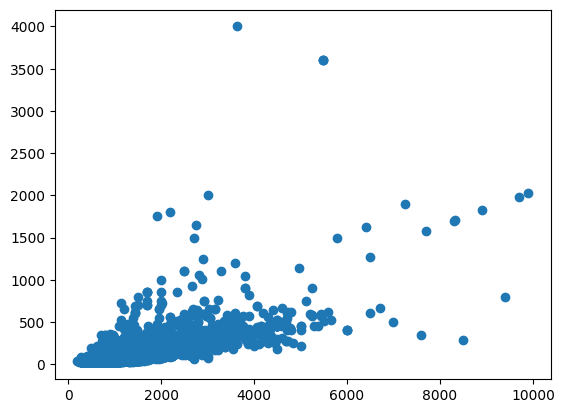

In [7]:
plt.scatter(df.Area , df.Price)

In [8]:
df = df[~(df.Price>1000)]

In [9]:
df = df[~(df.Area>6000)]

In [10]:
df = df[~(df.Price*100000/df.Area>25000)]

In [11]:
df = df[~(df.Price*100000/df.Area<8000)]

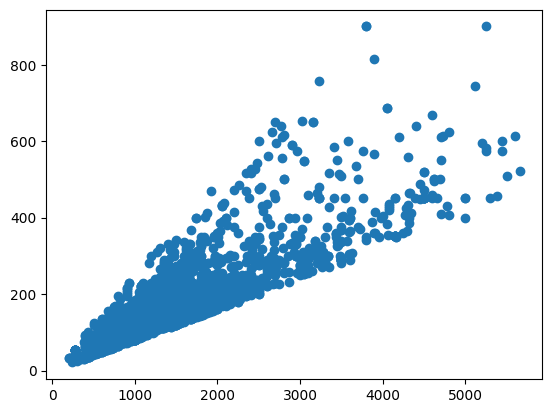

In [12]:
plt.scatter(df.Area , df.Price)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4f2d59288>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4f2d59b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4f29ac7c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4f2d61848>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4f2d61e88>],
 'means': []}

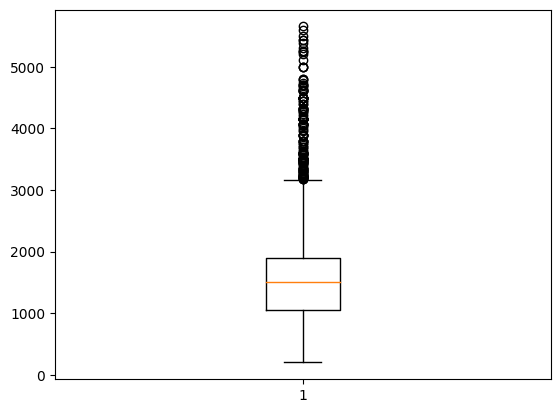

In [13]:
plt.boxplot(df.Area)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4f2dd2a88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4f2dd62c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4f2dd21c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4f2ddd4c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4f2dd6f48>],
 'means': []}

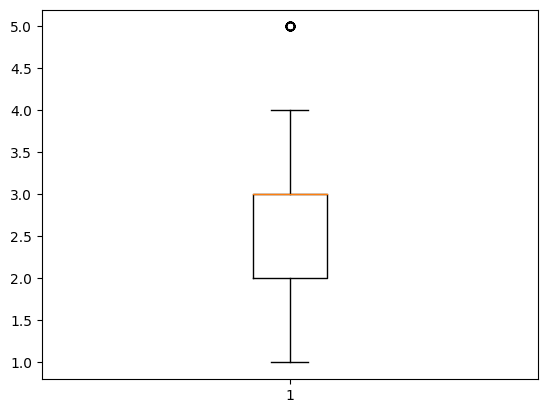

In [14]:
plt.boxplot(df['No. of Bedrooms'])

In [15]:
df.Location = df.Location.apply(lambda x:x.strip())
df.Location

0       JP Nagar Phase 1
16      JP Nagar Phase 1
34      JP Nagar Phase 1
54         Sahakar Nagar
61          Banashankari
              ...       
9381       Borivali East
9382       Goregaon West
9387             Belapur
9388              Airoli
9389              Airoli
Name: Location, Length: 2404, dtype: object

In [16]:
dummy_city = pd.get_dummies(df.City , drop_first=True)
dummy_city.head()

,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,0,0,0,0,0
16,0,0,0,0,0
34,0,0,0,0,0
54,0,0,0,0,0
61,0,0,0,0,0


In [17]:
len(df.Location.unique())

314

In [18]:
location_stats = df.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_less10 = location_stats[location_stats<=10]

In [19]:
df.Location = df.Location.apply(lambda x: 'other' if x in location_less10 else x)

In [20]:
dummy_location = pd.get_dummies(df.Location)
dummy_location.head()

,Alaknanda,Anna Nagar,BTM Layout,Banjara Hills,Bellandur,Borivali East,Chembur,Chittaranjan Park,Choolaimedu,Dattapada,...,Sector-18 Dwarka,Shastri Nagar,T Nagar,Thane,Thane West,Thiruvanmiyur,Thoraipakkam OMR,Vadapalani,Vasant Kunj,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df = pd.concat([df,dummy_location,dummy_city],axis='columns')
df.drop(['Location' , 'City','other'],axis='columns' , inplace=True)

In [22]:
df.head()

,Price,Area,No. of Bedrooms,Alaknanda,Anna Nagar,BTM Layout,Banjara Hills,Bellandur,Borivali East,Chembur,...,Thane West,Thiruvanmiyur,Thoraipakkam OMR,Vadapalani,Vasant Kunj,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,300.0,3340,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,300.0,3340,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,300.0,3340,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,237.0,2470,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,231.0,2480,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = df.Price
x = df.drop('Price',axis='columns')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train , y_train)

LinearRegression()

In [29]:
model.score(X_test,y_test)

0.8114862261999879

In [30]:
from sklearn.tree import DecisionTreeRegressor
md1 = DecisionTreeRegressor()
md1.fit(X_train,y_train)
md1.score(X_test,y_test)

0.7864541986600043

In [45]:
from sklearn.ensemble import RandomForestRegressor
md2 = RandomForestRegressor(n_estimators=65)
md2.fit(X_train,y_train)
md2.score(X_test,y_test)

0.8089836642316502

In [32]:
import pickle

In [36]:
# import pickle
# pickle.dump(md2,open('House.pkl','wb'))

In [37]:
lo = pickle.load(open('House.pkl','rb'))
lo.score(X_test,y_test)

0.8023429428048886

In [44]:
# file = open('Location.txt','w')
# for i in df.columns:
#     if(i=='Price'or i=='Area' or i=='No. of Bedrooms'or i=='Chennai'or i== 'Delhi'or i=='Hyderabad' or i== 'Kolkata' or i=='Mumbai'):
#         pass
#     else:
#         file.write(i+'\n')
# file.close()